In [1]:
import pandas as pd 
import numpy as np 

In [2]:
data=pd.read_csv("sales_data_sample.csv",encoding="unicode_escape")
df=data.copy()
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
todel=["ADDRESSLINE1","ADDRESSLINE2","PHONE","STATE"]
df=df.drop(todel,axis=1)

In [4]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [6]:
import datetime as dt 

In [7]:
df["ORDERDATE"]=pd.to_datetime(df["ORDERDATE"])

In [8]:
snap_time=df["ORDERDATE"].max()+dt.timedelta(days=1)

In [9]:
df_rfm=df.groupby(["CUSTOMERNAME"]).agg({
    "ORDERDATE": lambda x:(snap_time-x.max()).days,
    "ORDERNUMBER": "count",
    "SALES": "sum"
})

In [11]:
df_rfm=df_rfm.rename(columns={
    "ORDERDATE": "frequency",
    "ORDERNUMBER": "recency",
    "SALES": "montary_value"
})

In [12]:
df_RFM=df_rfm.copy()

In [14]:
df_rfm["f"]=pd.qcut(df_rfm["frequency"],q=4,labels=range(4,0,-1))
df_rfm["r"]=pd.qcut(df_rfm["recency"],q=4,labels=range(1,5))
df_rfm["m"]=pd.qcut(df_rfm["montary_value"],q=4,labels=range(1,5))

In [15]:
df_rfm["score"]=df_rfm[["f","r","m"]].sum(axis=1)

In [27]:
df_rfm.head()

,frequency,recency,montary_value,f,r,m,score
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4,10
Alpha Cognac,65,20,70488.44,4,2,2,8
Amica Models & Co.,265,26,94117.26,1,2,3,6
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4,11
Atelier graphique,188,7,24179.96,2,1,1,4


In [28]:
def fun(df):
    if bool(df["score"]>=10):
        return "high value customer"
    elif bool(df["score"]<10) and bool(df["score"]>=6):
        return "mid value customer"
    else:
        return "low value customer"
df_rfm["RFM_LEVEL"]=df_rfm.apply(fun,axis=1)
df_rfm.head()

,frequency,recency,montary_value,f,r,m,score,RFM_LEVEL
CUSTOMERNAME,,,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4,10,high value customer
Alpha Cognac,65,20,70488.44,4,2,2,8,mid value customer
Amica Models & Co.,265,26,94117.26,1,2,3,6,mid value customer
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4,11,high value customer
Atelier graphique,188,7,24179.96,2,1,1,4,low value customer


In [29]:
df_RFM.head()

,frequency,recency,montary_value
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


In [30]:
data=np.log(df_RFM)
data.head()

,frequency,recency,montary_value
CUSTOMERNAME,,,
"AV Stores, Co.",5.278115,3.931826,11.969133
Alpha Cognac,4.174387,2.995732,11.163204
Amica Models & Co.,5.579730,3.258097,11.452297
"Anna's Decorations, Ltd",4.430817,3.828641,11.944683
Atelier graphique,5.236442,1.945910,10.093279


In [31]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(data)
normalize=ss.transform(data)

In [42]:
from sklearn.cluster import KMeans 
import seaborn as sns 

sse={}

for k in range(1,21):
    kmeans=KMeans(n_clusters=k,random_state=1)
    kmeans.fit(normalize)
    sse[k]=kmeans.inertia_

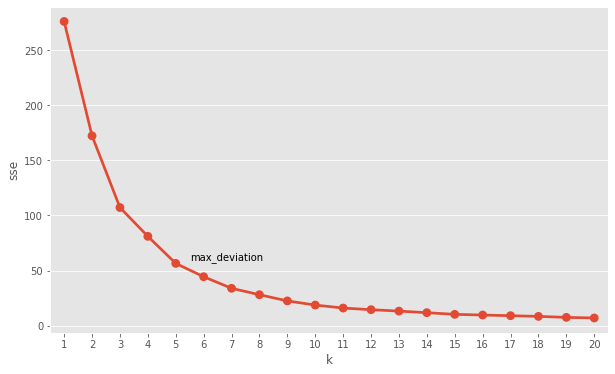

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.xlabel("k")
plt.ylabel("sse")
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
plt.text(4.5,60,"max_deviation")
plt.style.use("ggplot")
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,random_state=1)
kmeans.fit(normalize)
df_RFM["cluster"]=